<a href="https://colab.research.google.com/github/2021B0121099/Diabetes-Prediction-Using-Machine-Learning/blob/main/DIABETES_PREDICTION_using_Large_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

In [ ]:
!pip install lightgbm

In [ ]:
!pip install vaex

  Using cached vaex-4.17.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached vaex-core-4.17.1.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached vaex_astro-0.9.3-py3-none-any.whl.metadata (345 bytes)
  Using cached vaex_hdf5-0.14.1-py3-none-any.whl.metadata (321 bytes)
  Using cached vaex_viz-0.5.4-py3-none-any.whl.metadata (345 bytes)
  Using cached vaex_server-0.9.0-py3-none-any.whl.metadata (430 bytes)
  Using cached vaex_jupyter-0.8.2-py3-none-any.whl.metadata (517 bytes)
  Using cached vaex_ml-0.18.3-py3-none-any.whl.metadata (485 bytes)
  Using cached aplus-0.11.0-py3-none-any.whl
  Using cached blake3-1.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ipyvolume-0.6.3-py3-none-any.whl.metadata (2.3 kB)
  Using cached ipympl-0.9.6-py3-none-any.whl.metadata (8.7 kB)
  Using cached ipyvuetify-1.11.0-py2.py3-none-any.whl.met

In [ ]:
# Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
import time
process = psutil.Process()
!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

from pandas import set_option
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, f1_score, auc, roc_curve, roc_auc_score

In [ ]:
df = pd.read_csv('diabetes_new(1).csv')

In [ ]:
import vaex

ModuleNotFoundError: No module named 'vaex'

In [ ]:
diabetes_data=vaex.from_pandas(df)

In [ ]:
type(diabetes_data)

vaex.dataframe.DataFrameLocal

EDA(EXPLORATORY DATA ANALYSIS)

In [ ]:
diabetes_data = pd.read_csv('diabetes_new(1).csv') # Import diabetes dataset
diabetes_data.head(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Information of datasets
print("The scale of data is", diabetes_data.shape, "\n")
diabetes_data.info()

The scale of data is (10000, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10000 non-null  int64  
 1   Pregnancies             10000 non-null  int64  
 2   PlasmaGlucose           10000 non-null  int64  
 3   DiastolicBloodPressure  10000 non-null  int64  
 4   TricepsThickness        10000 non-null  int64  
 5   SerumInsulin            10000 non-null  int64  
 6   BMI                     10000 non-null  float64
 7   DiabetesPedigree        10000 non-null  float64
 8   Age                     10000 non-null  int64  
 9   Diabetic                10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [ ]:
# Statistical of datasets
# Drop the PatientID columns and transpose the data
diabetes_data.drop(columns=['PatientID']).describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,10000.0,3.255800,3.405720,0.000000,0.000000,2.000000,6.000000,14.000000
PlasmaGlucose,10000.0,107.850200,31.920909,44.000000,84.000000,105.000000,129.000000,192.000000
DiastolicBloodPressure,10000.0,71.207500,16.801478,24.000000,58.000000,72.000000,85.000000,117.000000
TricepsThickness,10000.0,28.817600,14.506480,7.000000,15.000000,31.000000,41.000000,92.000000
SerumInsulin,10000.0,139.243600,133.777919,14.000000,39.000000,85.000000,197.000000,796.000000
BMI,10000.0,31.567022,9.804366,18.200807,21.247427,31.922421,39.328921,56.034628
DiabetesPedigree,10000.0,0.400944,0.381463,0.078044,0.137065,0.199698,0.621158,2.301594
Age,10000.0,30.134100,12.106047,21.000000,22.000000,24.000000,35.000000,77.000000
Diabetic,10000.0,0.334400,0.471804,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Reviewing Skew of Attribute Distribution
skew_value = diabetes_data.skew()

In [ ]:
skewness_values = pd.DataFrame({
    'Variable': diabetes_data.columns,
    'Skewness': skew_value
})
plt.figure(figsize=(20,8))
# Plot the skewness values using a barplot
sns.barplot(x='Variable', y='Skewness', data=skewness_values)

# Add labels and a title to the plot

plt.xlabel("Features",size=15)
plt.ylabel("Skewness",size=15)
plt.title("Skewness of Variables in Diabetes Dataset",size=20)

plt.show()

NameError: name 'pd' is not defined

Data Visualization

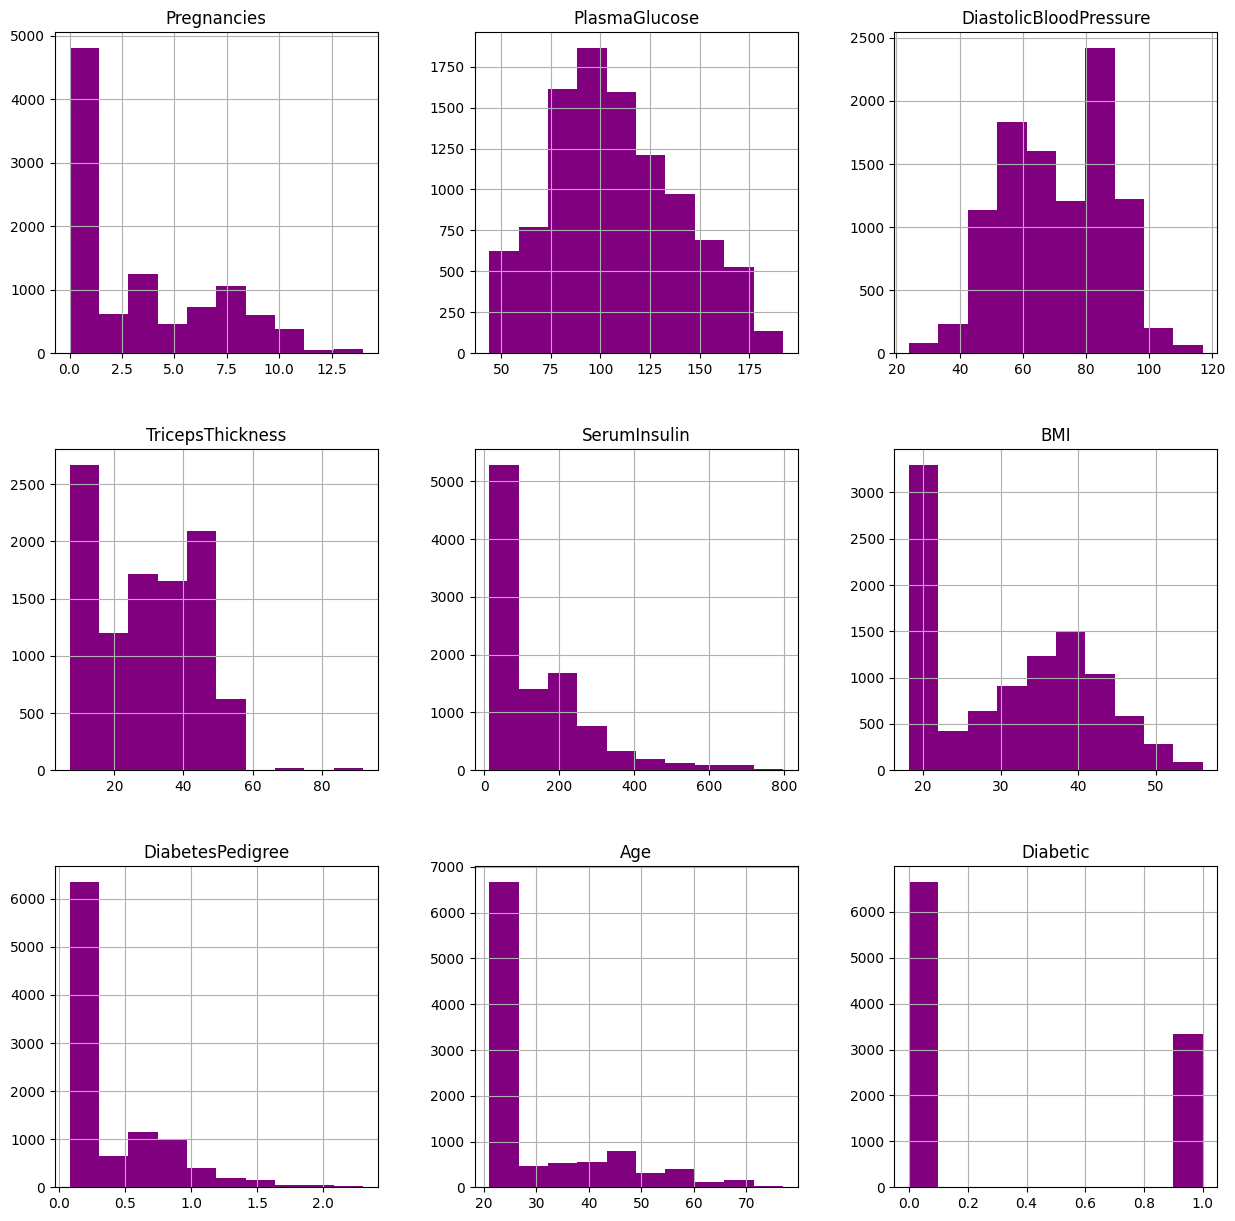

In [ ]:
# Histrogram for each attribute in dataset
diabetes_data.hist(figsize=(15,15),column=diabetes_data.drop(columns=['PatientID']).columns,color='purple')
plt.show()

Diabetic
0    6656
1    3344
dtype: int64


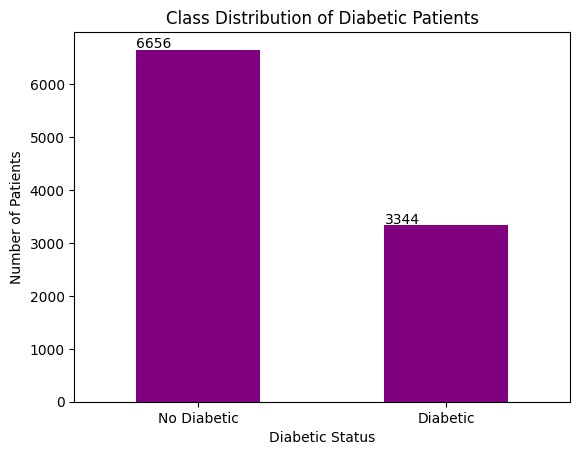

In [ ]:
# Class distribution to preview diabetic statistics
result = diabetes_data.groupby('Diabetic').size()
print(result)

ax = result.plot(kind='bar', color='purple')  # Plot only once

# Set labels and title
ax.set_xticklabels(['No Diabetic', 'Diabetic'], rotation=0) # More descriptive x-axis labels
ax.set_xlabel("Diabetic Status")
ax.set_ylabel("Number of Patients")
ax.set_title("Class Distribution of Diabetic Patients")

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show() # Important to display the plot

In [ ]:
# Define the feature matrix and target vector before feature selection
X = diabetes_data.drop(columns=['Diabetic'])
y = diabetes_data['Diabetic']
print(X,y)

      PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0       1354778            0            171                      80   
1       1147438            8             92                      93   
2       1640031            7            115                      47   
3       1883350            9            103                      78   
4       1424119            1             85                      59   
...         ...          ...            ...                     ...   
9995    1469198            6             95                      85   
9996    1432736            0             55                      51   
9997    1410962            5             99                      59   
9998    1958653            0            145                      67   
9999    1332938           10            100                      54   

      TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  
0                   34            23  43.509726          1.213191   21  
1

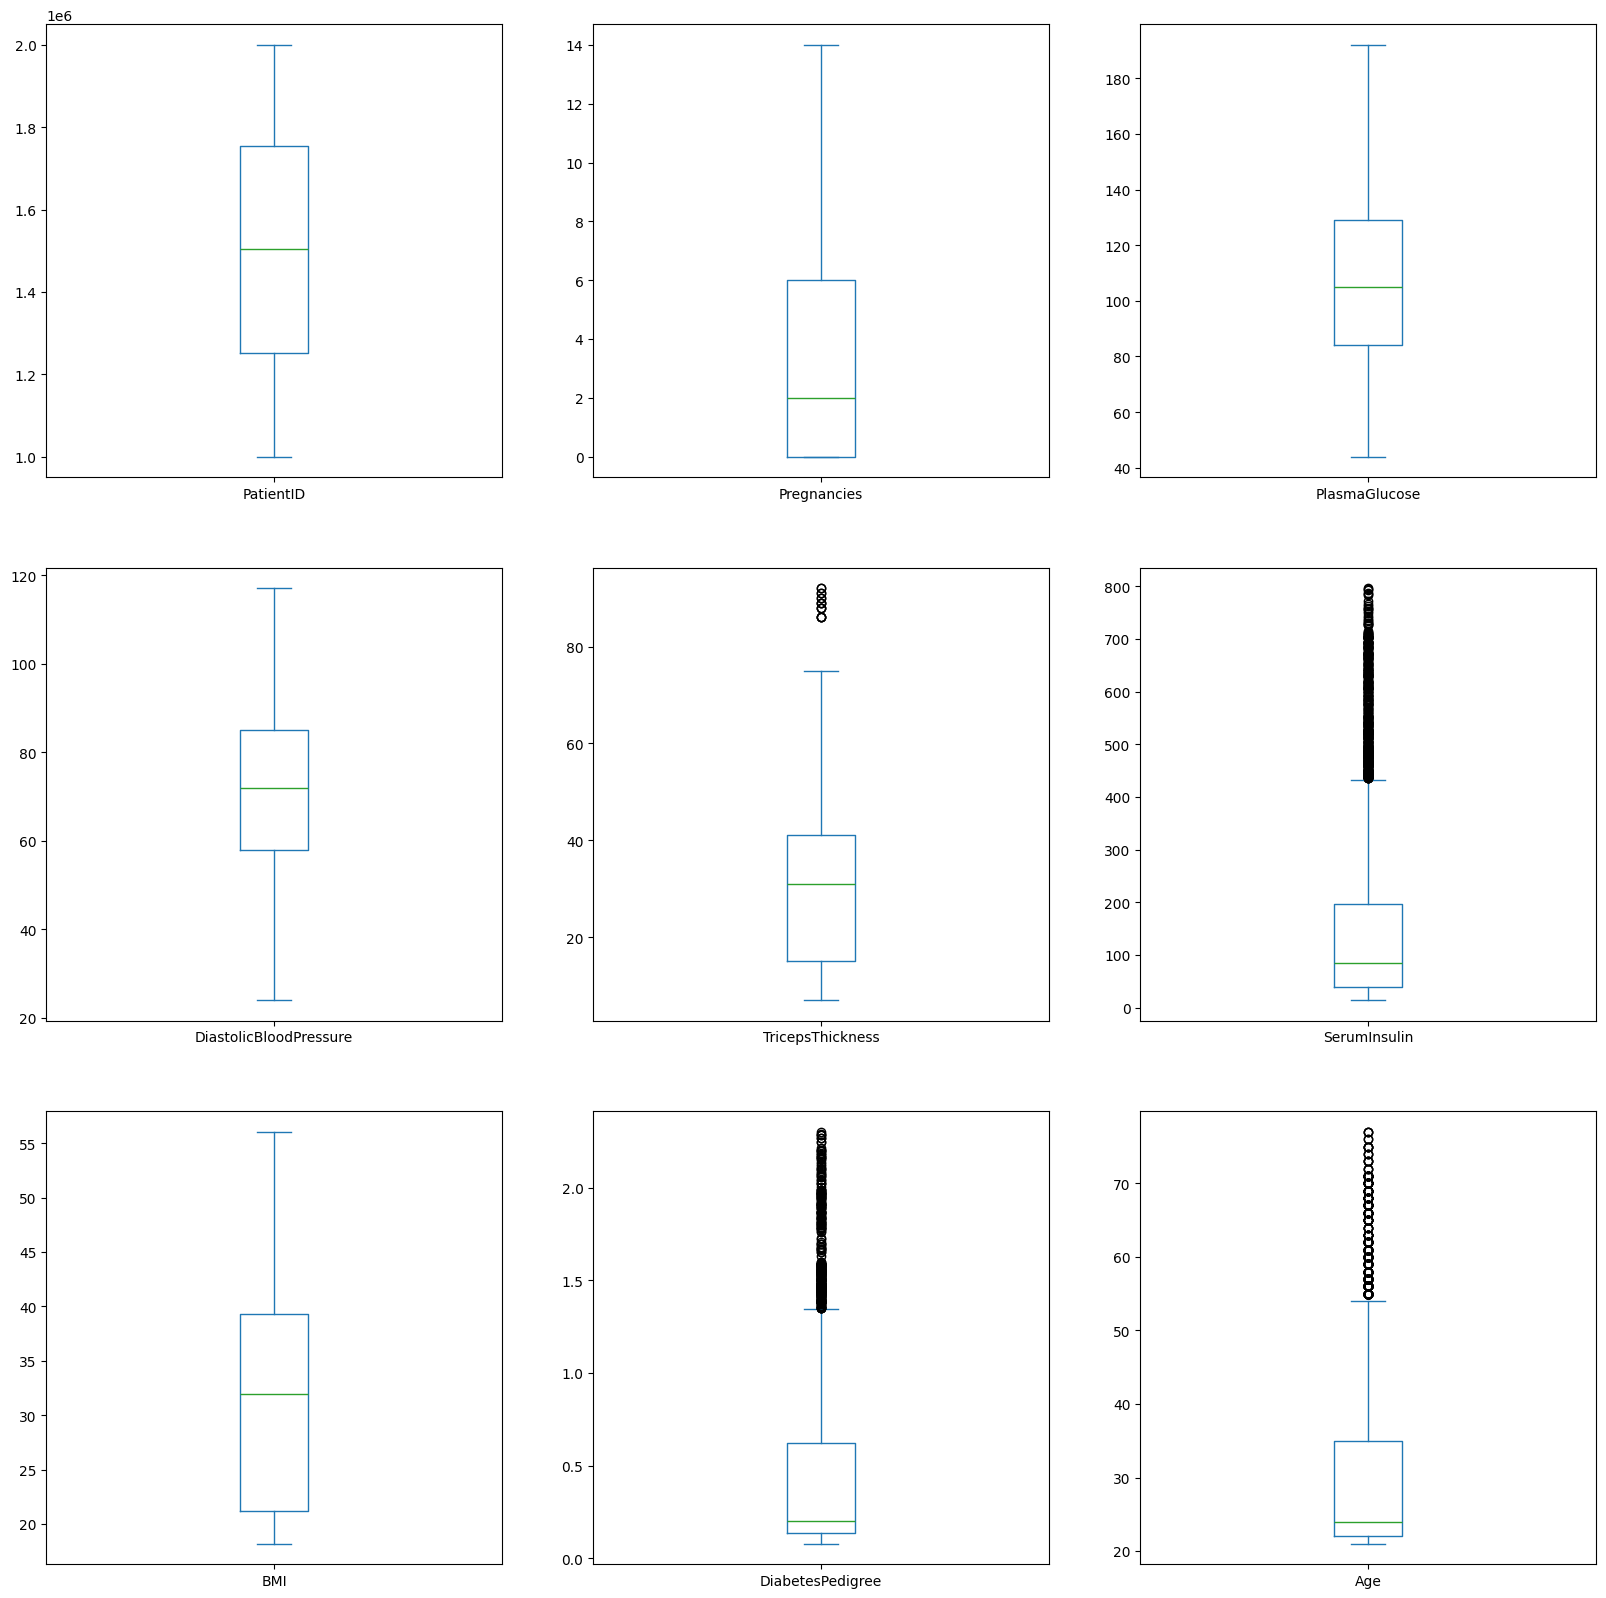

In [ ]:
# Box and Whisker Plots
X.plot(figsize=(20,20),kind='box',subplots=True,layout=(3,3),sharex=False)
plt.show()

**Feature Selection Method**

Filter Method Filter methods are a type of feature selection method that works by selecting features based on some criteria prior to building the model.

In our example dataset, all of the features are numeric. Hence, we cannot remove any feature from feature matrix through filter method

**Pearson's Coorelation**

Correlation between each features

In [ ]:
# Reviewing Correlation between attributes
correlations = round(X.corr(),4)
correlations # 1 represent full positive correlation, -1 represent negative correllation

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
PatientID,1.0000,0.0046,0.0048,0.0151,-0.0038,-0.0289,-0.0053,-0.0217,-0.0100
Pregnancies,0.0046,1.0000,0.0559,0.0503,0.0600,0.1158,0.0981,0.0560,0.1444
PlasmaGlucose,0.0048,0.0559,1.0000,0.0091,0.0262,0.0285,0.0220,0.0110,0.0367
DiastolicBloodPressure,0.0151,0.0503,0.0091,1.0000,0.0020,0.0157,0.0165,0.0156,0.0429
TricepsThickness,-0.0038,0.0600,0.0262,0.0020,1.0000,0.0191,0.0299,-0.0035,0.0674
SerumInsulin,-0.0289,0.1158,0.0285,0.0157,0.0191,1.0000,0.0475,0.0435,0.0872
BMI,-0.0053,0.0981,0.0220,0.0165,0.0299,0.0475,1.0000,0.0287,0.0627
DiabetesPedigree,-0.0217,0.0560,0.0110,0.0156,-0.0035,0.0435,0.0287,1.0000,0.0593
Age,-0.0100,0.1444,0.0367,0.0429,0.0674,0.0872,0.0627,0.0593,1.0000


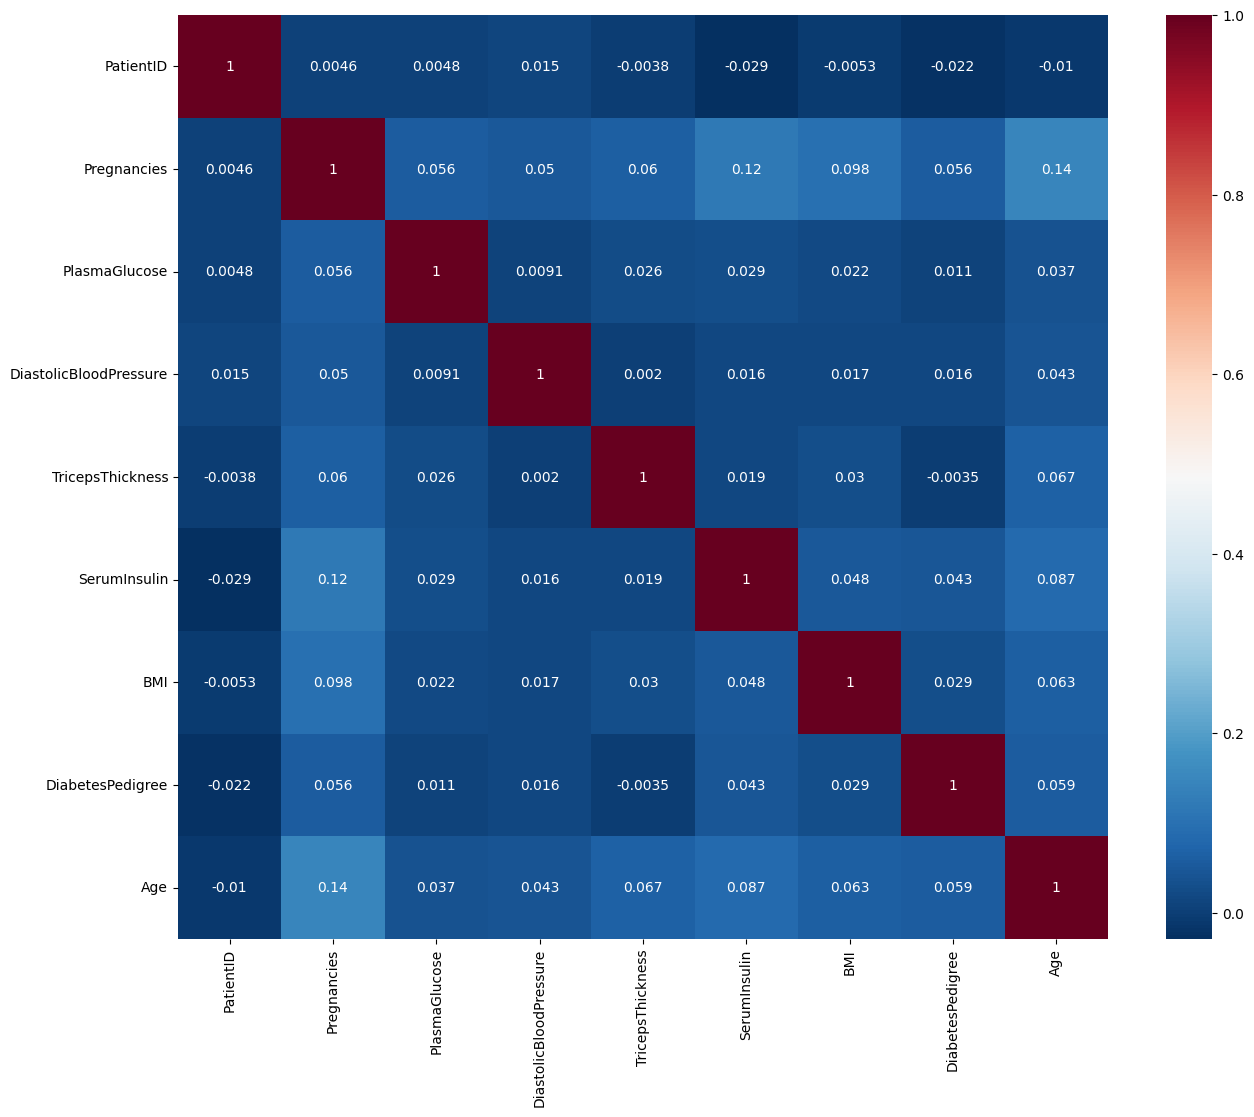

In [ ]:
# Visualize the resulting correlation matrix using a heatmap:

plt.figure(figsize=(15,12))
sns.heatmap(correlations, annot=True,cmap ='RdBu_r')
plt.show()

In [ ]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(correlations.columns)):
    for j in range(i):
        # Print variables with high correlation
        if abs(correlations.iloc[i, j]) > 0.7:
            print(correlations.columns[i], correlations.columns[j], correlations.iloc[i, j])
else:
    print('The coefficient of each features not greater than 0.7')

The coefficient of each features not greater than 0.7


In [ ]:
# Merge features and targets together for checking correlation
X_y = X.copy()
X_y['Diabetic'] = y
print(X_y)

      PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0       1354778            0            171                      80   
1       1147438            8             92                      93   
2       1640031            7            115                      47   
3       1883350            9            103                      78   
4       1424119            1             85                      59   
...         ...          ...            ...                     ...   
9995    1469198            6             95                      85   
9996    1432736            0             55                      51   
9997    1410962            5             99                      59   
9998    1958653            0            145                      67   
9999    1332938           10            100                      54   

      TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
0                   34            23  43.509726          1.213191   21   

In [ ]:
correlation = X_y.corr()
correlation_target = correlation[['Diabetic']].drop(labels=['Diabetic'])
correlation_target

,Diabetic
PatientID,-0.021959
Pregnancies,0.405161
PlasmaGlucose,0.128800
DiastolicBloodPressure,0.086689
TricepsThickness,0.144062
SerumInsulin,0.244907
BMI,0.213245
DiabetesPedigree,0.171613
Age,0.356701


In [ ]:
X = X.drop(columns=['PatientID'])
print(X.columns) # Check the feature matrix
X.head()

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = pd.DataFrame(scaler.fit_transform(X),columns=['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'])
X_scaler.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,-0.956028,1.978420,0.523343,0.357265,-0.868973,1.218162,2.129402,-0.754545
1,1.393079,-0.496571,1.297123,1.253461,-0.771792,-1.053302,-0.635948,-0.589330
2,1.099441,0.223996,-1.440868,1.598152,-0.779268,1.014344,-0.843964,-0.589330
3,1.686718,-0.151952,0.404300,-0.263178,1.231628,-0.202454,2.312072,1.062820
4,-0.662389,-0.715874,-0.726609,-0.125302,-0.779268,1.125832,0.389567,-0.671937


**Importing model training and feature selection libraries**

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
#from sklearn.model_selection import cross_val_score
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
#from sklearn.model_selection import GridSearchCV

**Wrapper Method Function (Sequential Forward Selection with Supervised Learning Algorithms)**

In [ ]:
def feature_selection(dt_model, x_data):

    # Ensure the random distributions are same when execute
    np.random.seed(0)

    sfs = SFS(dt_model,
          k_features=8,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

    sfs.fit(x_data, y)

    print('Feature selection: \n\n')
    for idx, score in sfs.subsets_.items():
    	print(idx,':', score, '\n')

    print('Model Accuracy: \n\n')
    for idx, score in sfs.subsets_.items():
        print(idx,':', score['avg_score'].round(4)*100, '%')

    plot_sfs(sfs.get_metric_dict())
    plt.grid()
    plt.title('Accuracy vs Number of Features')
    plt.show()

**Define the confusion matrix plotting Function**

In [ ]:
def conf_matrix_plot(conf_matrix):

    ax = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Negative','Positive'])
    ax.yaxis.set_ticklabels(['Negative','Positive'])

    ## Display the visualization of the Confusion Matrix.
    plt.plot(conf_matrix)
    plt.show()

In [ ]:
def class_report_plot(class_report):

    plt.figure(figsize=(10,3))
    plt.title('Model Classification Report\n\n')
    sns.heatmap(class_report, annot=True,  fmt='g')
    plt.show()

**Define the AUC ROC plotting function**

In [ ]:
def auc_roc(model,y_test,y_predicted):

    fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
    auc = round(metrics.roc_auc_score(y_test, y_predicted), 4)
    plt.plot(fpr,tpr,color='red', linestyle='--', marker='o', linewidth=2, label= model+" AUC="+str(auc))
    plt.grid()
    plt.legend()
    plt.title('AUC ROC of '+ model)
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.show()

**Decision Tree Algorithm**

Feature selection: 


1 : {'feature_idx': (0,), 'cv_scores': array([0.8255, 0.839 , 0.8445, 0.836 , 0.8225]), 'avg_score': 0.8334999999999999, 'feature_names': ('Pregnancies',)} 

2 : {'feature_idx': (0, 7), 'cv_scores': array([0.886 , 0.8955, 0.894 , 0.8835, 0.875 ]), 'avg_score': 0.8868, 'feature_names': ('Pregnancies', 'Age')} 

3 : {'feature_idx': (0, 3, 7), 'cv_scores': array([0.873, 0.881, 0.896, 0.88 , 0.882]), 'avg_score': 0.8824, 'feature_names': ('Pregnancies', 'TricepsThickness', 'Age')} 

4 : {'feature_idx': (0, 3, 5, 7), 'cv_scores': array([0.8815, 0.8845, 0.8925, 0.8865, 0.8835]), 'avg_score': 0.8856999999999999, 'feature_names': ('Pregnancies', 'TricepsThickness', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 3, 4, 5, 7), 'cv_scores': array([0.896 , 0.9065, 0.9045, 0.893 , 0.8945]), 'avg_score': 0.8988999999999999, 'feature_names': ('Pregnancies', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 3, 4, 5, 7), 'cv_scores': array([0.903 , 0.8945, 0

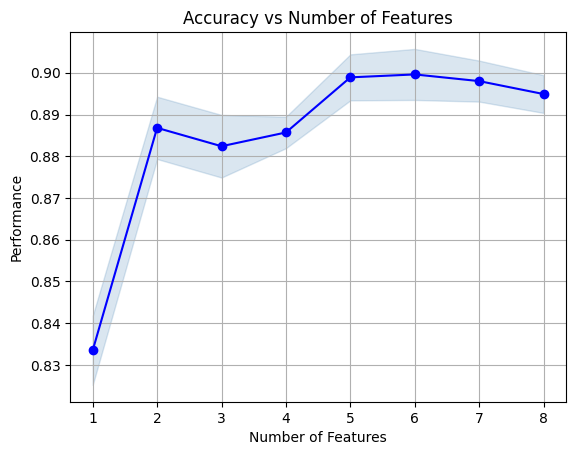

In [ ]:
# Decision Tree Algorithm
start_time = time.time()
initial_memory = process.memory_info().rss

dt_model = DecisionTreeClassifier()

# Import feature_selection function
feature_selection(dt_model, X)

In [ ]:
 # From wrapper method, we know which features removed was useful to increase accuracy of model.
X_data = X[['Pregnancies', 'PlasmaGlucose', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

dt_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = dt_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

NameError: name 'X' is not defined

In [ ]:
# np.random.seed(0)

# parameters = {
#     'max_depth': [2,4,6,8,10],
#     'max_leaf_nodes': [10,15,20,25,30,35,40]
# }

# dt_model = DecisionTreeClassifier()
# random = RandomizedSearchCV(dt_model, parameters, n_iter=30)
# random.fit(X_train,y_train)

# df = pd.concat([pd.DataFrame(random.cv_results_['params']), pd.DataFrame(random.cv_results_['mean_test_score']*100, columns=['Accuracy'])] ,axis=1)
# display(df.sort_values('Accuracy', ascending = False))

Validation set accuracy after hyperparameter tuning:  91.6 %

Decision Tree Model Test Set Accuracy:  91.24 %

Decision Tree Model Confusion Matrix: 



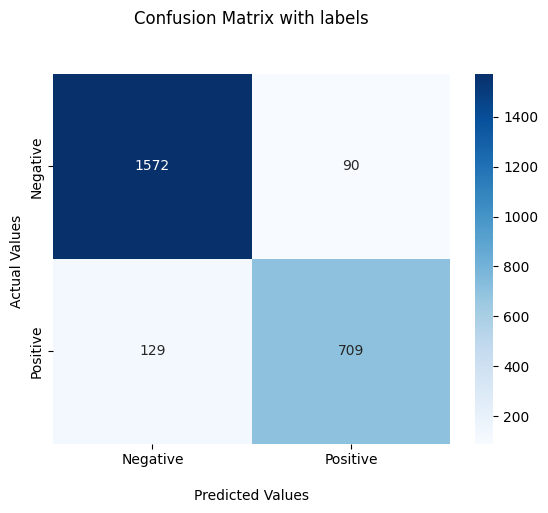

Decision Tree Model Classification Report: 



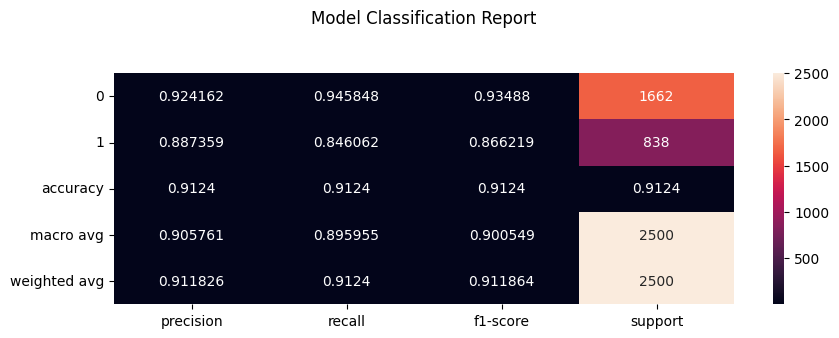

Memory usage: 2641920 bytes

Runtime: 1227.89 s


In [ ]:
dt_model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=40)

dt_model.fit(X_train,y_train)

# Using validation set to get the accuracy after model training
y_val_pred = dt_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

y_predicted_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_predicted_dt)
print("Decision Tree Model Test Set Accuracy: ", round(accuracy*100,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_dt)
print("Decision Tree Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_dt, output_dict=True)).transpose()
print("Decision Tree Model Classification Report: \n")
class_report_plot(class_report)

end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')
print("Runtime:", round(run_time,2), 's')

**K Nearest Neighbors Algorithm**

Feature selection: 


1 : {'feature_idx': (0,), 'cv_scores': array([0.7895, 0.7885, 0.7955, 0.836 , 0.7695]), 'avg_score': 0.7958, 'feature_names': ('Pregnancies',)} 

2 : {'feature_idx': (0, 7), 'cv_scores': array([0.8735, 0.881 , 0.875 , 0.877 , 0.878 ]), 'avg_score': 0.8769, 'feature_names': ('Pregnancies', 'Age')} 

3 : {'feature_idx': (0, 5, 7), 'cv_scores': array([0.8955, 0.8955, 0.8975, 0.8915, 0.9065]), 'avg_score': 0.8973000000000001, 'feature_names': ('Pregnancies', 'BMI', 'Age')} 

4 : {'feature_idx': (0, 4, 5, 7), 'cv_scores': array([0.8995, 0.9065, 0.903 , 0.898 , 0.9055]), 'avg_score': 0.9025000000000001, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 1, 4, 5, 7), 'cv_scores': array([0.8905, 0.9   , 0.8945, 0.8905, 0.895 ]), 'avg_score': 0.8940999999999999, 'feature_names': ('Pregnancies', 'PlasmaGlucose', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 2, 4, 5, 7), 'cv_scores': array([0.8855, 0.8865, 0.8755, 0.8755, 

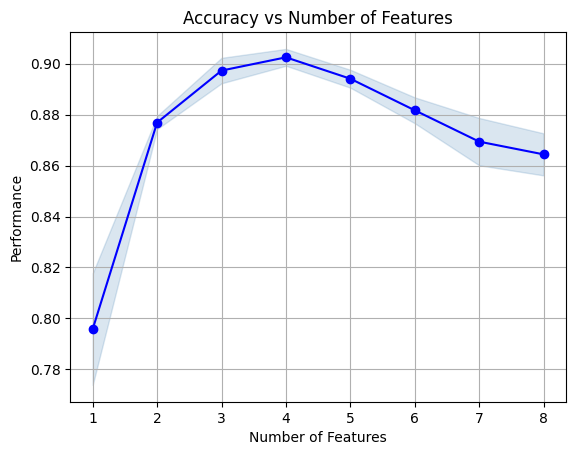

In [ ]:
start_time = time.time()
initial_memory = process.memory_info().rss

knn_model = KNeighborsClassifier()

feature_selection(knn_model, X_scaler)

In [ ]:
X_data = X_scaler[['Pregnancies', 'SerumInsulin', 'BMI', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = knn_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  90.8 %



The maximum accuracy is 91.33333333333333 when the K value is [6] after feature selection.



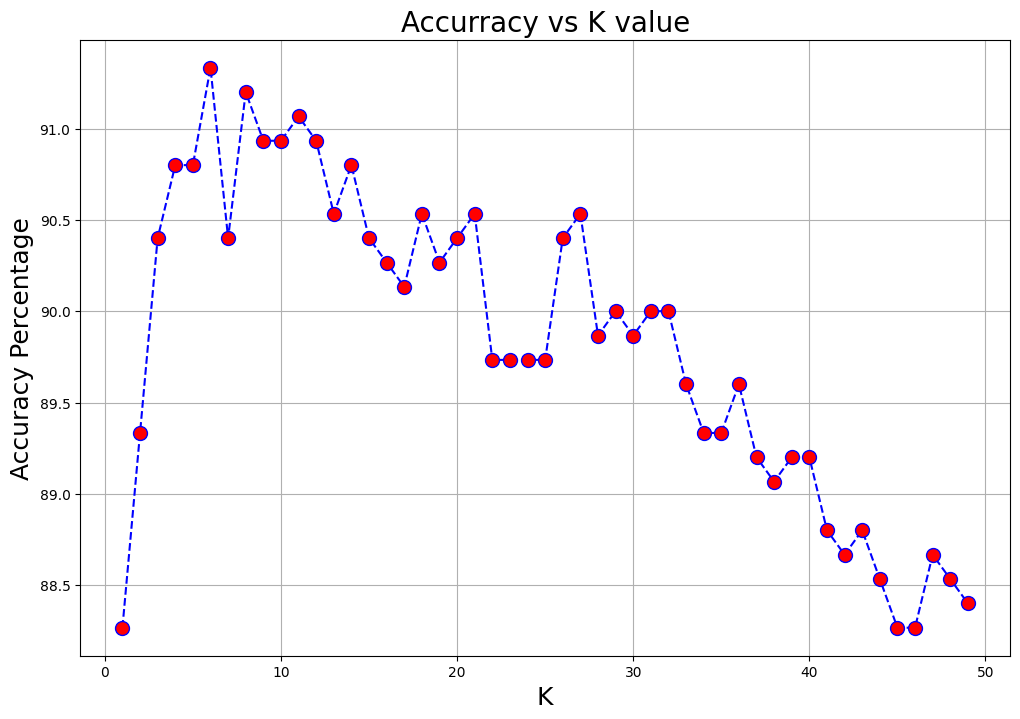

In [ ]:
# Define the best value of K in KNN
score_list = []
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    score = model.score(X_val, y_val)
    score_list.append(score*100)

max_score = max(score_list)

k = [idx+1 for idx, score in enumerate(score_list) if score == max_score]
print(f'The maximum accuracy is {max_score} when the K value is {k} after feature selection.\n')

plt.figure(figsize=(12,8))
plt.plot(range(1,50), score_list, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accurracy vs K value',size=20)
plt.xlabel('K',size=18)
plt.ylabel('Accuracy Percentage',size=18)
plt.grid()
plt.show()

Validation set accuracy after hyperparameter tuning:  91.33 %

K Nearest Neighbor Model Test Set Accuracy:  90.08 %

K Nearest Neighbor Model Confusion Matrix: 



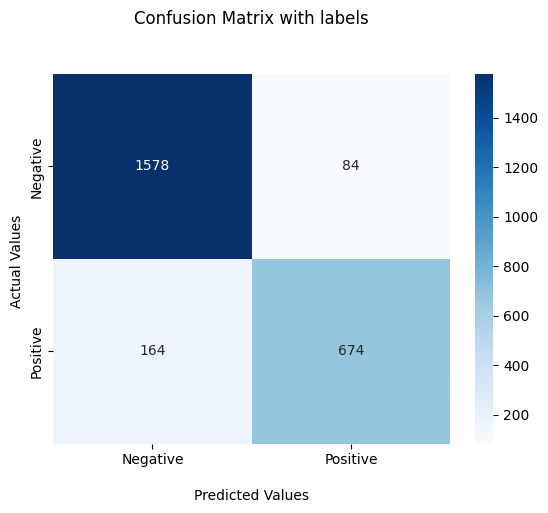

K Nearest Neighbor Model Classification Report: 



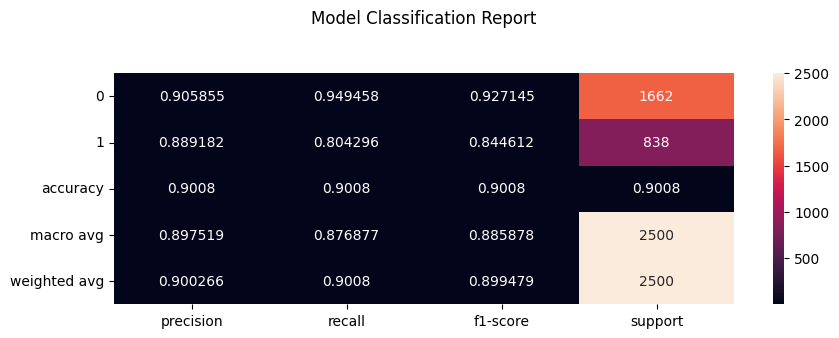

Memory usage: 7979008 bytes

Runtime: 1173.82 s


In [ ]:
knn_model = KNeighborsClassifier(6)

knn_model.fit(X_train,y_train)

# Using validation set to get the accuracy after model training
y_val_pred = knn_model.predict(X_val)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

y_predicted_knn = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_knn)
print("K Nearest Neighbor Model Test Set Accuracy: ", round(accuracy*100,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_knn)
print("K Nearest Neighbor Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_knn, output_dict=True)).transpose()
print("K Nearest Neighbor Model Classification Report: \n")
class_report_plot(class_report)


end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')

print("Runtime:", round(run_time,2), 's')

**Logistic Regression Algorithm**

Feature selection: 


1 : {'feature_idx': (7,), 'cv_scores': array([0.7445, 0.7505, 0.728 , 0.7455, 0.7675]), 'avg_score': 0.7472, 'feature_names': ('Age',)} 

2 : {'feature_idx': (5, 7), 'cv_scores': array([0.745 , 0.7515, 0.738 , 0.7495, 0.7655]), 'avg_score': 0.7499, 'feature_names': ('BMI', 'Age')} 

3 : {'feature_idx': (0, 5, 7), 'cv_scores': array([0.7465, 0.756 , 0.738 , 0.7545, 0.7605]), 'avg_score': 0.7511, 'feature_names': ('Pregnancies', 'BMI', 'Age')} 

4 : {'feature_idx': (0, 4, 5, 7), 'cv_scores': array([0.7725, 0.7705, 0.7575, 0.768 , 0.771 ]), 'avg_score': 0.7679, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 4, 5, 6, 7), 'cv_scores': array([0.782 , 0.7775, 0.765 , 0.7675, 0.7775]), 'avg_score': 0.7739, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age')} 

6 : {'feature_idx': (0, 3, 4, 5, 6, 7), 'cv_scores': array([0.781 , 0.78  , 0.7735, 0.779 , 0.782 ]), 'avg_score': 0.7790999999999999, 'featu

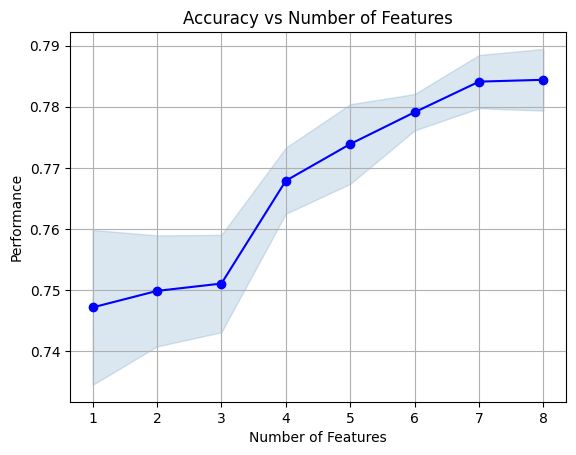

In [ ]:
# Logistic Regression Algorithm
start_time = time.time()
initial_memory = process.memory_info().rss

# The initial value of maximum iteration cannot converge
lr_model = LogisticRegression(max_iter=1000)

# Import feature_selection function
feature_selection(lr_model, X)

In [ ]:
# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

lr_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = lr_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  79.6 %



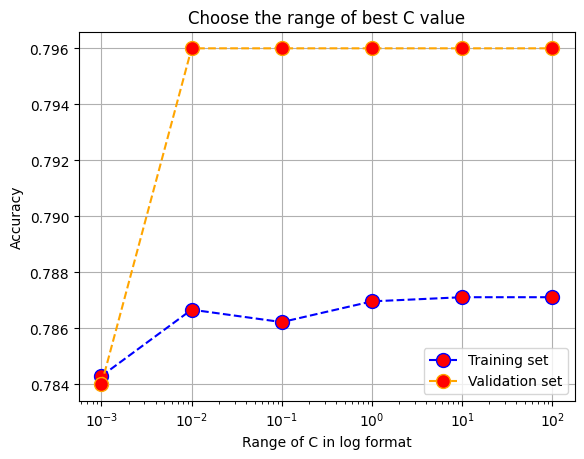

In [ ]:
train_array = []
test_array = []
C_array = [0.001, 0.01, 0.1, 1, 10, 100]

for x in C_array:
    clf_new = LogisticRegression(max_iter=1000, C=x)
    clf_new.fit(X_train,y_train)
    y_pred_train = clf_new.predict(X_train)
    train_array.append(accuracy_score(y_pred_train,y_train))
    y_pred_val = clf_new.predict(X_val)
    test_array.append(accuracy_score(y_pred_val,y_val))

plt.plot(C_array,train_array, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(C_array,test_array, color='orange', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.legend(['Training set', 'Validation set'])
plt.title('Choose the range of best C value')
plt.xlabel('Range of C in log format')
plt.ylabel('Accuracy')
plt.grid()
plt.xscale('log')
plt.show()

In [ ]:
#Grid Search approach for hyperparameter tuning
# C_range = np.logspace(-2,2,100)

# parameters = {'C': C_range, 'penalty':['l1','l2'], 'solver':['saga','lbfgs']}

# lr_model = LogisticRegression(max_iter=1000)

# grid = GridSearchCV(lr_model, parameters, cv=3)

# grid.fit(X_train,y_train)

# print("Best parameters:", grid.best_params_, "\n")
# print("Best score:", round(grid.best_score_*100,2), "%\n")

Validation set accuracy after hyperparameter tuning:  79.6 %

Logistic Regression Model Test set accuracy:  78.04 %

Logistic Regression Model Confusion Matrix: 



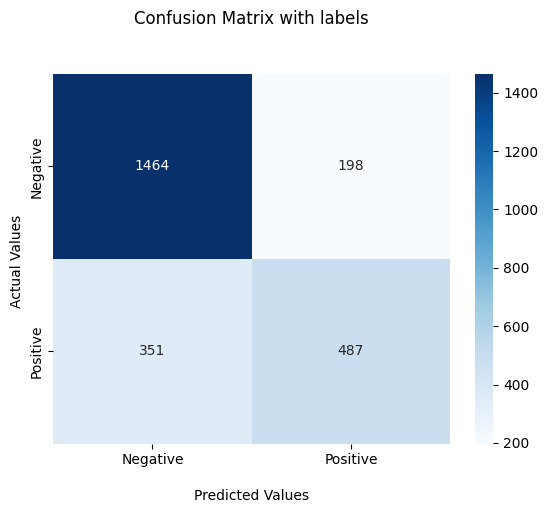

Logistic Regression Model Classification Report: 



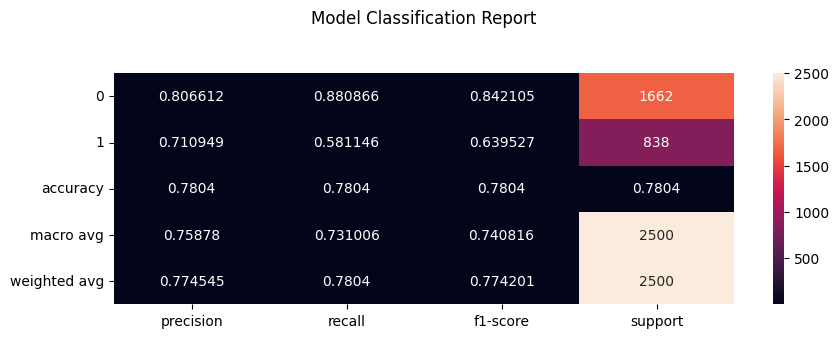

Memory usage: -8699904 bytes

Runtime: 216.31 s


In [ ]:
# Logistic Regression Algorithm
lr_model = LogisticRegression(max_iter=10000,C=0.059,penalty='l2',solver='lbfgs')

lr_model.fit(X_train,y_train)

# Using validation set to get the accuracy after model training
y_val_pred = lr_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

# Using test set to get the accuracy after model training

y_predicted_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test,y_predicted_lr)
print("Logistic Regression Model Test set accuracy: ", round(accuracy*100,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_lr)
print("Logistic Regression Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test,y_predicted_lr, output_dict=True)).transpose()
print("Logistic Regression Model Classification Report: \n")
class_report_plot(class_report)


end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')

print("Runtime:", round(run_time,2), 's')

**Random Forests Algorithm**

Feature selection: 


1 : {'feature_idx': (0,), 'cv_scores': array([0.8255, 0.839 , 0.8445, 0.836 , 0.8225]), 'avg_score': 0.8334999999999999, 'feature_names': ('Pregnancies',)} 

2 : {'feature_idx': (0, 7), 'cv_scores': array([0.887 , 0.8935, 0.894 , 0.8825, 0.879 ]), 'avg_score': 0.8872, 'feature_names': ('Pregnancies', 'Age')} 

3 : {'feature_idx': (0, 3, 7), 'cv_scores': array([0.889 , 0.8875, 0.9085, 0.889 , 0.8935]), 'avg_score': 0.8934999999999998, 'feature_names': ('Pregnancies', 'TricepsThickness', 'Age')} 

4 : {'feature_idx': (0, 3, 5, 7), 'cv_scores': array([0.911 , 0.91  , 0.9185, 0.915 , 0.918 ]), 'avg_score': 0.9145, 'feature_names': ('Pregnancies', 'TricepsThickness', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 3, 4, 5, 7), 'cv_scores': array([0.934 , 0.9275, 0.932 , 0.927 , 0.9235]), 'avg_score': 0.9288000000000001, 'feature_names': ('Pregnancies', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 3, 4, 5, 7), 'cv_scores': array([0.9405, 0.93

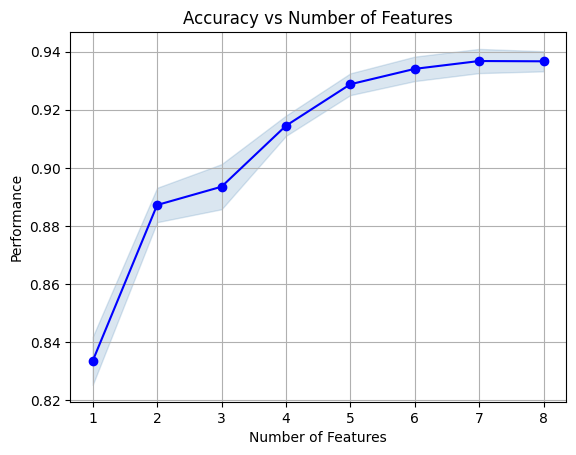

In [ ]:
start_time = time.time()
initial_memory = process.memory_info().rss

rf_model = RandomForestClassifier()

feature_selection(rf_model,X)

In [ ]:
X_data = X[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=10)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=10)

rf_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  94.13 %



Validation set accuracy is 94.8 % after the maximum depth of the tree was defined is 12


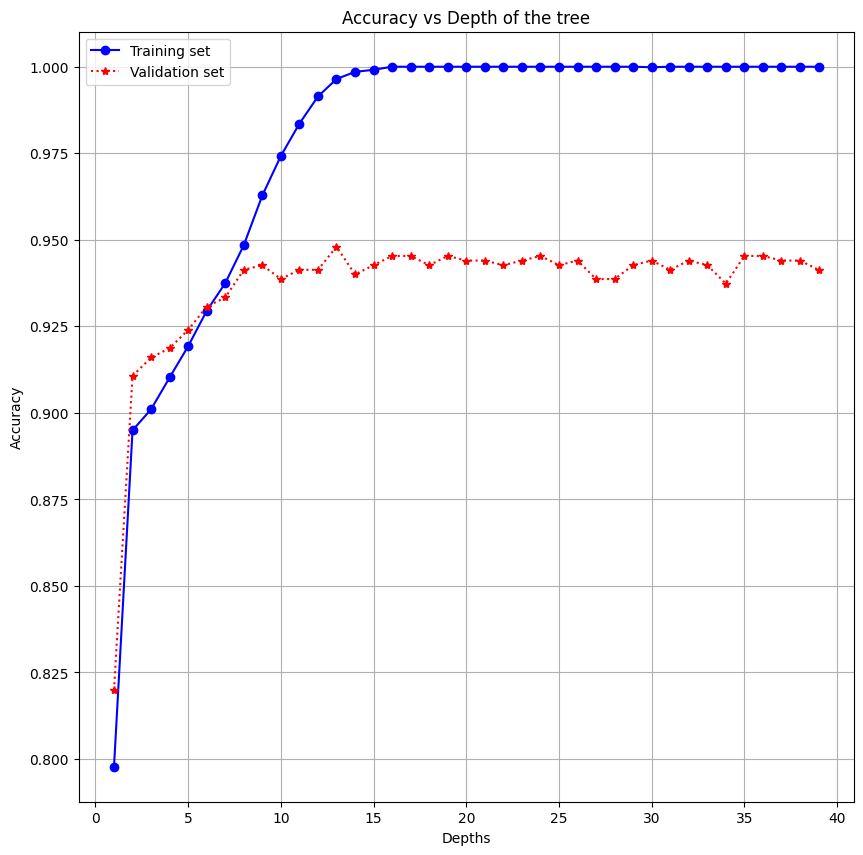

In [ ]:
accuracy_train = []
accuracy_test = []

np.random.seed(0)
depths = range(1,40)
for i in depths:
    crf = RandomForestClassifier(max_depth=i)
    crf.fit(X_train, y_train)
    accuracy_test.append(accuracy_score(y_val, crf.predict(X_val)))
    accuracy_train.append(accuracy_score(y_train, crf.predict(X_train)))

max_accuracy = np.max(accuracy_test)*100
max_depth = np.argmax(accuracy_test)

print('Validation set accuracy is', round(max_accuracy,3) ,'% after the maximum depth of the tree was defined is', max_depth)

plt.figure(figsize=(10,10))
plt.plot(depths,accuracy_train,'bo-',depths,accuracy_test,'r*:')
plt.grid()
plt.legend(['Training set','Validation set'])
plt.title('Accuracy vs Depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
# np.random.seed(0)
# parameters = {
#         'n_estimators': (100,300,500,700,900,1000),
#         'min_samples_split': (1,3,5,7,9,),
#         'min_samples_leaf':(1,3,5,7,9),
#         'max_features':(0.5,0.8,'auto'),
#         'max_depth':('None',25,30,35,40)
# }

# grid = GridSearchCV(rf_model, parameters, cv=2)

# grid.fit(X_train,y_train)

# print("Best parameters:", grid.best_params_)
# print("Best score of training data:", round(grid.best_score_*100,2), "%\n")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import time
import psutil

# Corrected parameters
rf_model = RandomForestClassifier(
    max_depth=40,
    max_features='sqrt',  # Change this to 'sqrt', 'log2', a specific integer, or None
    n_estimators=100,
    min_samples_leaf=1,
    min_samples_split=2,  # This must be at least 2
)

# Start timing and memory usage tracking
start_time = time.time()
initial_memory = psutil.Process().memory_info().rss

# Fit model
rf_model.fit(X_train, y_train)

# Validation set predictions and accuracy
y_val_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy * 100, 2), "%\n")

# Test set predictions, probabilities, and accuracy
y_predicted_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
accuracy = rf_model.score(X_test, y_test) * 100
print("Random Forest Model Test Set Accuracy:", round(accuracy, 2), "%\n")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted_rf)
print("Random Forest Model Confusion Matrix: \n", conf_matrix)

# Classification report
class_report = pd.DataFrame(classification_report(y_test, y_predicted_rf, output_dict=True)).transpose()
print("Random Forest Model Classification Report: \n", class_report)

# Calculate runtime and memory usage
end_time = time.time()
run_time = end_time - start_time
final_memory = psutil.Process().memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')
print("Runtime:", round(run_time, 2), 's')


Validation set accuracy after hyperparameter tuning:  94.4 %

Random Forest Model Test Set Accuracy: 93.48 %

Random Forest Model Confusion Matrix: 
 [[1547   56]
 [ 107  790]]
Random Forest Model Classification Report: 
               precision    recall  f1-score    support
0              0.935308  0.965066  0.949954  1603.0000
1              0.933806  0.880713  0.906483   897.0000
accuracy       0.934800  0.934800  0.934800     0.9348
macro avg      0.934557  0.922889  0.928219  2500.0000
weighted avg   0.934769  0.934800  0.934357  2500.0000
Memory usage: 0 bytes

Runtime: 1.04 s


**Support Vector Machine (SVM) Algorithm**

Feature selection: 


1 : {'feature_idx': (7,), 'cv_scores': array([0.7735, 0.7845, 0.777 , 0.7805, 0.793 ]), 'avg_score': 0.7817000000000001, 'feature_names': ('Age',)} 

2 : {'feature_idx': (4, 7), 'cv_scores': array([0.7925, 0.805 , 0.7915, 0.7935, 0.8055]), 'avg_score': 0.7976, 'feature_names': ('SerumInsulin', 'Age')} 

3 : {'feature_idx': (0, 4, 7), 'cv_scores': array([0.83  , 0.8325, 0.8245, 0.8255, 0.83  ]), 'avg_score': 0.8285, 'feature_names': ('Pregnancies', 'SerumInsulin', 'Age')} 

4 : {'feature_idx': (0, 4, 5, 7), 'cv_scores': array([0.842 , 0.847 , 0.833 , 0.8475, 0.8445]), 'avg_score': 0.8428000000000001, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 1, 4, 5, 7), 'cv_scores': array([0.853 , 0.8555, 0.8435, 0.8565, 0.8565]), 'avg_score': 0.8530000000000001, 'feature_names': ('Pregnancies', 'PlasmaGlucose', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 4, 5, 6, 7), 'cv_scores': array([0.8535, 0.856 , 0.8435, 0.8565

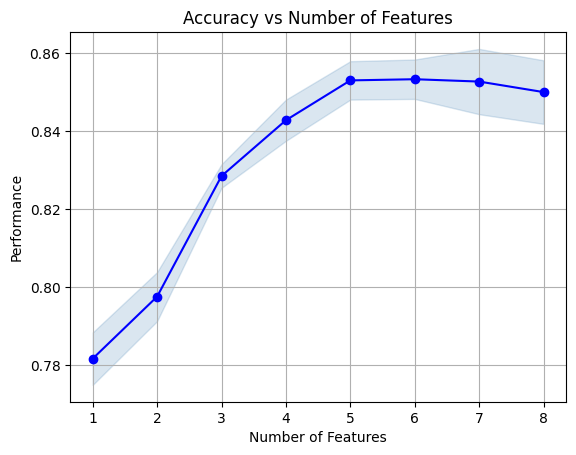

In [ ]:
import time
start_time = time.time()
initial_memory = process.memory_info().rss

# Initialize the value of C, kernel & gamma
svm_model = SVC(C=1,kernel='rbf',gamma=0.001)

feature_selection(svm_model, X)

In [ ]:
X_data = X[['Pregnancies', 'PlasmaGlucose', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']]

# Split 25% data for test set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

svm_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy before feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy before feature selection:  83.2 %



In [ ]:
# parameters = {'C':[1,10,100,1000],
#                   'kernel':['linear','rbf'],
#                   'gamma':[0.001,0.0001]}

# grid = GridSearchCV(svm_model, parameters, cv=2)

# grid.fit(X_train,y_train)

# print("Best parameters:", grid.best_params_)
# print("Best score of training data:", round(grid.best_score_*100,2), "%\n")

Support Vector Machine Model Validation Set Accuracy: 86.67 %

Support Vector Machine Model Test Set Accuracy: 88.76 %

Support Vector Machine Model Confusion Matrix: 



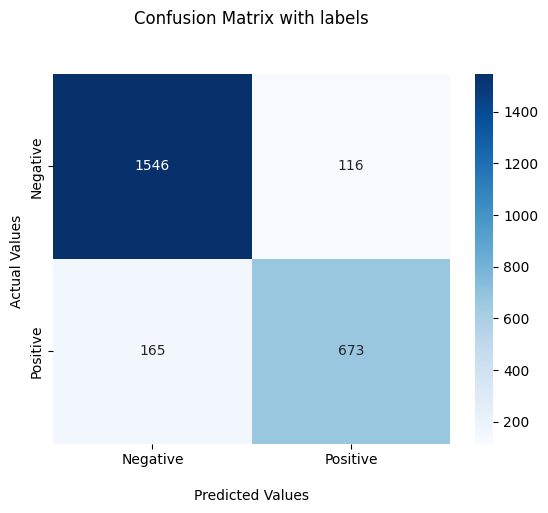

Support Vector Machine Model Classification Report: 



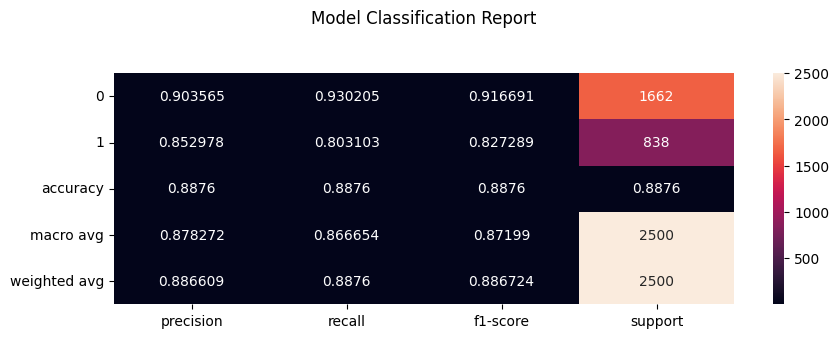

Memory usage: 169717760 bytes

Runtime: 3366.04 s


In [ ]:
svm_model = SVC(C=1000,
               kernel='rbf',
               gamma=0.0001,
               probability=True)

svm_model.fit(X_train,y_train)


y_predicted_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
accuracy = svm_model.score(X_val,y_val)*100
print("Support Vector Machine Model Validation Set Accuracy:", round(accuracy,2), "%\n")

#  the accuracy of the final model on the test data
accuracy = svm_model.score(X_test,y_test)*100
print("Support Vector Machine Model Test Set Accuracy:", round(accuracy,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_svm)
print("Support Vector Machine Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_svm, output_dict=True)).transpose()
print("Support Vector Machine Model Classification Report: \n")
class_report_plot(class_report)



end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')

print("Runtime:", round(run_time,2), 's')

**LGBM Algorithm**

[LightGBM] [Info] Number of positive: 2676, number of negative: 5324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.334500 -> initscore=-0.687902
[LightGBM] [Info] Start training from score -0.687902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

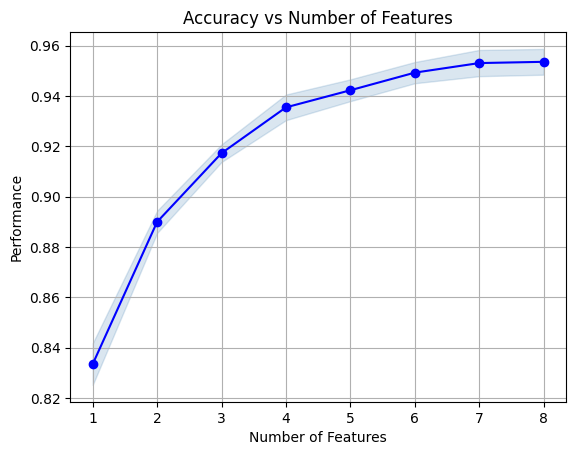

In [ ]:
start_time = time.time()
initial_memory = process.memory_info().rss

lgbm_model = LGBMClassifier()

feature_selection(lgbm_model,X)

In [ ]:
# Split 25% data for test set
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# Split 10% data for validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

lgbm_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = lgbm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

[LightGBM] [Info] Number of positive: 2268, number of negative: 4482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 6750, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336000 -> initscore=-0.681171
[LightGBM] [Info] Start training from score -0.681171
Validation set accuracy after feature selection:  94.93 %



In [ ]:
# np.random.seed(0)
# parameters = {
#         'colsample_bytree': (0.1,0.5,0.8),
#         'max_depth': [5,10,15],
#         'num_leaves': [20,30,40,50,60,70,80],
#         'subsample':(0.5,0.8),
#         'n_estimators':(50,100),
# }

# random = RandomizedSearchCV(lgbm_model, parameters, n_iter=30, cv=5)

# random.fit(X_train,y_train)

# df = pd.concat([pd.DataFrame(random.cv_results_['params']), pd.DataFrame(random.cv_results_['mean_test_score']*100, columns=['Accuracy'])] ,axis=1)
# display(df.sort_values('Accuracy', ascending = False))

[LightGBM] [Info] Number of positive: 2268, number of negative: 4482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 6750, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336000 -> initscore=-0.681171
[LightGBM] [Info] Start training from score -0.681171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

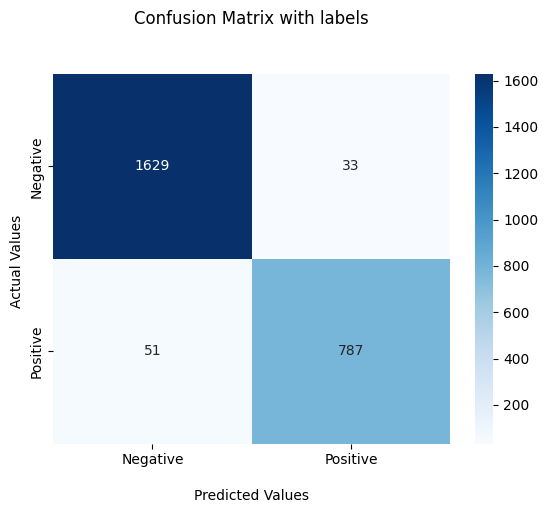

LGBM Classifier Model Classification Report: 



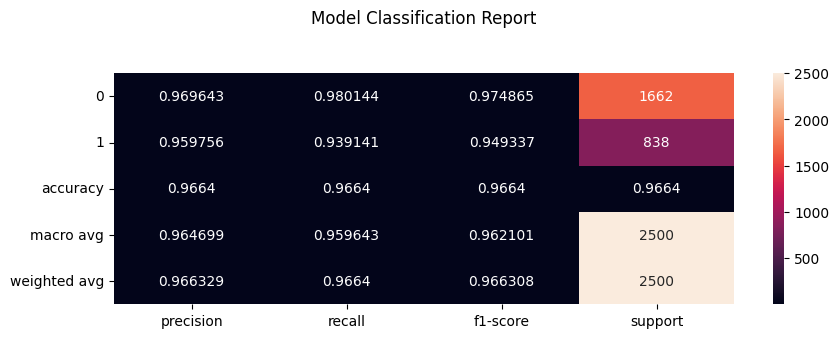

Memory usage: 3645440 bytes

Runtime: 100.86 s


In [ ]:
lgbm_model = LGBMClassifier( max_depth=15,
                             num_leaves= 30,
                             n_estimators=100,
                             subsample=0.8,
                             colsample_bytree=0.1
                           )

lgbm_model.fit(X_train,y_train)

y_val_pred = lgbm_model.predict(X_val)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_val, y_val_pred)
print("\nValidation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

y_predicted_lgbm = lgbm_model.predict(X_test)
accuracy = lgbm_model.score(X_test,y_test)*100
print("LGBM Classifier Model Test set accuracy:", round(accuracy,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_lgbm)
print("LGBM Classifier Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_lgbm, output_dict=True)).transpose()
print("LGBM Classifier Model Classification Report: \n")
class_report_plot(class_report)

end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')

print("Runtime:", round(run_time,2), 's')

0.4878


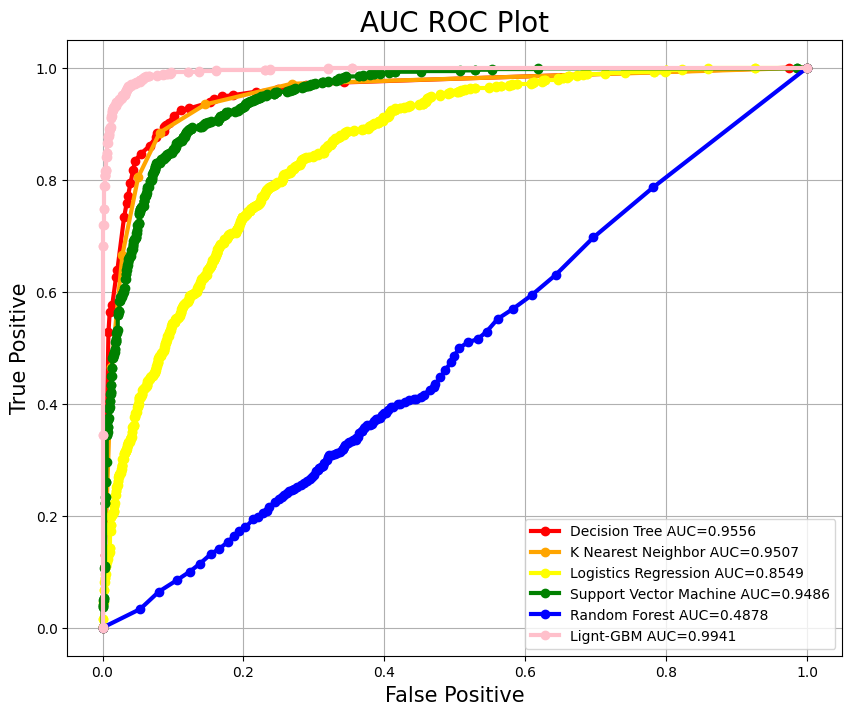

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_prob_dt, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_prob_knn, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_prob_lr, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_prob_svm, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_prob_rf, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, y_prob_lgbm, pos_label=1)

auc1 = round(roc_auc_score(y_test, y_prob_dt), 4)
auc2 = round(roc_auc_score(y_test, y_prob_knn), 4)
auc3 = round(roc_auc_score(y_test, y_prob_lr), 4)
auc4 = round(roc_auc_score(y_test, y_prob_svm), 4)
auc5 = round(roc_auc_score(y_test, y_prob_rf), 4)
auc6 = round(roc_auc_score(y_test, y_prob_lgbm), 4)

print(auc5)

plt.figure(figsize=(10,8))

plt.plot(fpr1,tpr1,color='red', linestyle='-', marker='o', linewidth=3, label= "Decision Tree AUC="+str(auc1))
plt.plot(fpr2,tpr2,color='orange', linestyle='-', marker='o', linewidth=3, label= "K Nearest Neighbor AUC="+str(auc2))
plt.plot(fpr3,tpr3,color='yellow', linestyle='-', marker='o', linewidth=3, label= "Logistics Regression AUC="+str(auc3))
plt.plot(fpr4,tpr4,color='green', linestyle='-', marker='o', linewidth=3, label= "Support Vector Machine AUC="+str(auc4))
plt.plot(fpr5,tpr5,color='blue', linestyle='-', marker='o', linewidth=3, label= "Random Forest AUC="+str(auc5))
plt.plot(fpr6,tpr6,color='pink', linestyle='-', marker='o', linewidth=3, label= "Lignt-GBM AUC="+str(auc6))

plt.grid()
plt.legend(loc='best')
plt.title('AUC ROC Plot',size=20)
plt.xlabel('False Positive',size=15)
plt.ylabel('True Positive',size=15)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

dt_precision, dt_recall, _ = precision_recall_curve(y_test, y_prob_dt)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, y_prob_knn)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_prob_lr)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_prob_svm)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_prob_rf)
lgbm_precision, lgbm_recall, _ = precision_recall_curve(y_test, y_prob_lgbm)

dt_auc = auc(dt_recall, dt_precision).round(3)
knn_auc = auc(knn_recall, knn_precision).round(3)
lr_auc = auc(lr_recall, lr_precision).round(3)
svm_auc = auc(svm_recall, svm_precision).round(3)
rf_auc = auc(rf_recall, rf_precision).round(3)
lgbm_auc = auc(lgbm_recall, lgbm_precision).round(3)

plt.figure(figsize=(10,8))
plt.plot(dt_recall,dt_precision,color='red', linestyle='--', marker='o', linewidth=3, label= "Decision Tree AUC="+str(dt_auc))
plt.plot(knn_recall,knn_precision,color='orange', linestyle='--', marker='o', linewidth=3, label= "K Nearest Neighbor AUC="+str(knn_auc))
plt.plot(lr_recall,lr_precision,color='yellow', linestyle='--', marker='o', linewidth=1, label= "Logistics Regression AUC="+str(lr_auc))
plt.plot(svm_recall,svm_precision,color='green', linestyle='--', marker='o', linewidth=3, label= "Support Vector Machine AUC="+str(svm_auc))
plt.plot(rf_recall,rf_precision,color='blue', linestyle='--', marker='o', linewidth=3, label= "Random Forest AUC="+str(rf_auc))
plt.plot(lgbm_recall,lgbm_precision,color='pink', linestyle='--', marker='o', linewidth=3, label= "Lignt-GBM AUC="+str(lgbm_auc))

plt.grid()
plt.title('PR Curve',size=20)
plt.legend(loc='best')
plt.xlabel('Recall',size=15)
plt.ylabel('Precision',size=15)
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming X and y are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your models and get predicted probabilities:
# For Decision Tree
dt_model.fit(X_train, y_train)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# For KNN
knn_model.fit(X_train, y_train)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# For Logistic Regression
lr_model.fit(X_train, y_train)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# For SVM (if using probability estimates; otherwise use decision_function)
svm_model.fit(X_train, y_train)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# For Random Forest
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# For LightGBM
lgbm_model.fit(X_train, y_train)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Now compute precision-recall curves:
dt_precision, dt_recall, _ = precision_recall_curve(y_test, y_prob_dt)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, y_prob_knn)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_prob_lr)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_prob_svm)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_prob_rf)
lgbm_precision, lgbm_recall, _ = precision_recall_curve(y_test, y_prob_lgbm)

# Calculate AUC for each:
dt_auc = auc(dt_recall, dt_precision).round(3)
knn_auc = auc(knn_recall, knn_precision).round(3)
lr_auc = auc(lr_recall, lr_precision).round(3)
svm_auc = auc(svm_recall, svm_precision).round(3)
rf_auc = auc(rf_recall, rf_precision).round(3)
lgbm_auc = auc(lgbm_recall, lgbm_precision).round(3)

# Plot the PR Curves
plt.figure(figsize=(10,8))
plt.plot(dt_recall, dt_precision, color='red', linestyle='--', marker='o', linewidth=3, label="Decision Tree AUC="+str(dt_auc))
plt.plot(knn_recall, knn_precision, color='orange', linestyle='--', marker='o', linewidth=3, label="K Nearest Neighbor AUC="+str(knn_auc))
plt.plot(lr_recall, lr_precision, color='yellow', linestyle='--', marker='o', linewidth=1, label="Logistic Regression AUC="+str(lr_auc))
plt.plot(svm_recall, svm_precision, color='green', linestyle='--', marker='o', linewidth=3, label="SVM AUC="+str(svm_auc))
plt.plot(rf_recall, rf_precision, color='blue', linestyle='--', marker='o', linewidth=3, label="Random Forest AUC="+str(rf_auc))
plt.plot(lgbm_recall, lgbm_precision, color='pink', linestyle='--', marker='o', linewidth=3, label="LightGBM AUC="+str(lgbm_auc))

plt.grid()
plt.title('PR Curve', size=20)
plt.legend(loc='best')
plt.xlabel('Recall', size=15)
plt.ylabel('Precision', size=15)
plt.show()


NameError: name 'X' is not defined